### <font color=FF3300>Calcul avec une source Mobile</font>
Dans ce tutoriel, on récupère un projet contenant des batiments et des récépteurs ponctuelles.
On récupéra les positions succéssive de la source mobile dans un fichier csv. Enfin nous modeliserons la source mobile et nous visualiserons le résultat par récépteur
On suivra les étapes suivantes
* Initialisation
* Récupération du projet et des positions
* Modélisation de la source mobile et calcul du résultat
* Visualisation

### <font color=FF3300> Initialisation </font>
On importe les différentes parties propres à TYMPAN le <font color='9900CC'>Projet</font>, le <font color='9900CC'>Model</font> et le <font color='9900CC'>Solver</font> mais aussi les outils comme Point3D, Spectrum, Source ou Directivity

In [1]:
from tympan.models.project import Project
from tympan.models.solver import Model, Spectrum, Source, Solver

In [2]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')
chemin_proj = r'Projet_source_mouvement.xml'
pos_src = r'Position_source_mobile.csv'

### <font color=FF3300> Récupération du projet et des positions </font>
On récupère le projet TYMPAN et on récupére les position succéssive de la source mobile.
```python
np.genfromtxt(pos_src, dtype='float',delimiter=';',skip_header=1) #crée un numpy array rempli des valeurs du fichier pos_src```

In [3]:
my_project = Project.from_xml(chemin_proj, verbose=True)
my_model = Model.from_project(my_project)
my_solver = Solver.from_project(my_project, verbose=True)
spec = Spectrum(np.array([80]*31,dtype=float))
positions = np.genfromtxt(pos_src, dtype='float',delimiter=';',skip_header=1)

D:\Tympan_exe\TYMPAN_exe\cython_d\tympan\altimetry\builder.py:71: RuntimeWarning: main site landtake (or surrounding level curve) does not appear to be closed; closing it for altimetry processing
  RuntimeWarning)


### <font color=FF3300> Modélisation de la source mobile et calcul du résultat </font>
Pour chacune des positions de la source on ajoute au model une source

In [4]:
for pos in positions:
    nv_src = Source(pos, spec)
    my_model.add_source(nv_src)

res = my_solver.solve(my_model)

### <font color=FF3300> Visualisation </font>
On va calculer la valeur globale par récépteur et tracer les visualisation en simultané, on affichera le tout à la fin

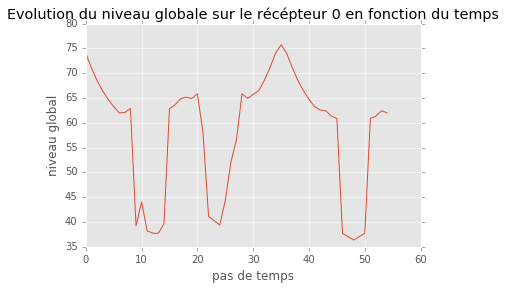

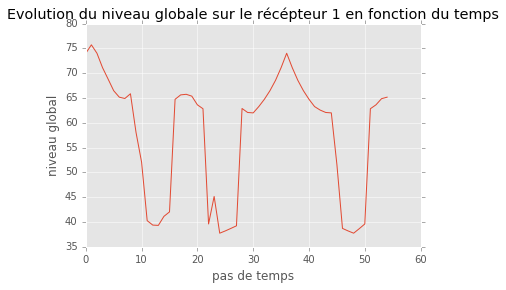

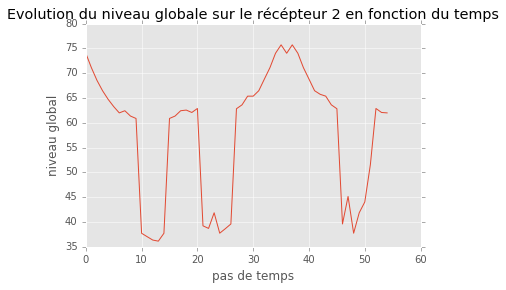

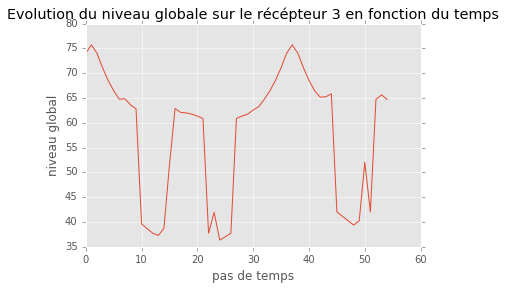

In [5]:
for id_rec in range(res.nreceptors):
    valg = []
    for id_src in range(res.nsources):
        valg.append(res.spectrum(id_rec,id_src).dBA)
    plt.figure()
    plt.title("Evolution du niveau globale sur le récépteur {} en fonction du temps".format(id_rec))
    plt.xlabel("pas de temps")
    plt.ylabel("niveau global")
    plt.plot(range(len(positions)),valg)
plt.show()
    